This is my first notebook in Julia

In [1]:
using DataFrames
using CSV

export_rows = DataFrame(CSV.File("../exportations_activity_rows.csv"));
export_cols = DataFrame(CSV.File("../exportations_activity_cols.csv"));

names(export_cols)

27-element Array{String,1}:
 "state"
 "year"
 "Exportaciones totales"
 "Industria alimentaria"
 "Industria de las bebidas y el tabaco"
 "Fabricación de insumos textiles y acabado de textiles"
 "Fabricación de productos textiles, excepto prendas de vestir"
 "Fabricación de prendas de vestir"
 "Industria del papel"
 "Industria química"
 "Industria del plástico y del hule"
 "Fabricación de productos a base de minerales no metálicos"
 "Industrias metálicas básicas"
 ⋮
 "Fabricación de equipo de computación, comunicación, medición y de otros equipos, componentes y accesorios electrónicos"
 "Fabricación de equipo de transporte"
 "Fabricación de muebles, colchones y persianas"
 "Otras industrias manufactureras"
 "Subsectores no especificados"
 "Minería de minerales metálicos y no metálicos, excepto petróleo y gas"
 "Curtido y acabado de cuero y piel, y fabricación de productos de cuero, piel y materiales sucedáneos"
 "Industria de la madera"
 "Impresión e industrias conexas"
 "Fabricación de 

Changing names of activities to english

In [2]:
categorias = names(export_cols)[3:27];

activities_en = ["Total", "Food", "Drinks and tobacco",
                   "Textiles", "Textile products", "Tailoring",
                   "Paper", "Chemistry", "Plastic",
                 "Minerals based", "Metal industry",
                 "Metal products",
                 "Machinery", "Electronics",
                 "Transport equipment",
                 "Furniture", "Other manufactures",
                 "Not specified",
                   "Mining", "Leather", "Wood",
                   "Printing", "Electricity", "Petroleum",
                 "Petroleum products"]

25-element Array{String,1}:
 "Total"
 "Food"
 "Drinks and tobacco"
 "Textiles"
 "Textile products"
 "Tailoring"
 "Paper"
 "Chemistry"
 "Plastic"
 "Minerals based"
 "Metal industry"
 "Metal products"
 "Machinery"
 "Electronics"
 "Transport equipment"
 "Furniture"
 "Other manufactures"
 "Not specified"
 "Mining"
 "Leather"
 "Wood"
 "Printing"
 "Electricity"
 "Petroleum"
 "Petroleum products"

To rename specific columns we can use a for loop in a traditional way, or by list comprehension

In [3]:
## For loop
for i in 3:27
    rename!(export_cols,
            (names(export_cols)[i] => activities_en[i-2]));
end

## List comprehension
rename!(export_cols,[
    (names(export_cols)[i] => activities_en[i-2]) for i in 3:27
]);

Translating the elements from Spanish to English

In [4]:
function translate(vector_es)
    vector_en = []
    for i in 1:length(vector_es)
        expression_es = vector_es[i]
        expression_en = equivalent(expression_es)
        ## Here "equivalent" should take expression.es and
        ## return the equivalent in English
        vector_en = append!(vector_en, expression_en)
    end
    return(vector_en)
end


function equivalent(expression_es)
    position = findall(x -> x == expression_es, categorias)
    expression_en = activities_en[position]
    return(expression_en)
end

## Test
equivalent("Industria química")

1-element Array{String,1}:
 "Chemistry"

In [5]:
translate(categorias)

25-element Array{Any,1}:
 "Total"
 "Food"
 "Drinks and tobacco"
 "Textiles"
 "Textile products"
 "Tailoring"
 "Paper"
 "Chemistry"
 "Plastic"
 "Minerals based"
 "Metal industry"
 "Metal products"
 "Machinery"
 "Electronics"
 "Transport equipment"
 "Furniture"
 "Other manufactures"
 "Not specified"
 "Mining"
 "Leather"
 "Wood"
 "Printing"
 "Electricity"
 "Petroleum"
 "Petroleum products"

Creating a new column "Activity" with the English expressions

In [6]:
using DataFramesMeta

export_rows = @linq export_rows |>
    transform(Activity = translate(:"Descripción"));

In [7]:
names(export_rows)

6-element Array{String,1}:
 "Código"
 "Descripción"
 "state"
 "year"
 "USD"
 "Activity"

DataFramesMeta comes handy for several data munging techniques such as tidyverse in R.

In [8]:
totals = @linq export_cols |>
    by(:state, total_export = sum(:Total)) |>
    sort!(:total_export)

,state,total_export
,String,Int64
1,Quinta Roo,517674
2,Nayarit,1146388
3,Baja California Sur,2303491
4,Colima,2518028
5,Guerrero,5918438
6,Sinaloa,7825439
7,Oaxaca,11023551
8,Tlaxcala,12987607
9,Chiapas,13291536


For visualizations Julia has several options, among others `Gadfly`

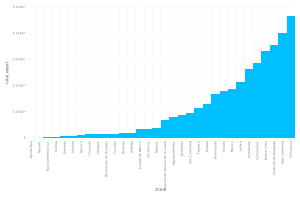

In [9]:
using Gadfly
set_default_plot_size(30cm, 20cm)

plot(totals, x = "state", y = "total_export", Geom.bar)

Or `VegaLite`

In [12]:
using VegaLite

export_cols |>
    @vlplot(:bar,
            y={"sum(Total)"},
            x={"state",
               sort = {encoding = "y"}})

TypeError: Cannot read property 'length' of undefined
    at expression (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:99:19)
    at Object.operator (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:118:30)
    at Context.operatorExpression (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:618:24)
    at Context.parseOperator (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:196:27)
    at /home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:30:36
    at Array.forEach (<anonymous>)
    at Context.parse (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:30:15)
    at run

TypeError: Cannot read property 'length' of undefined
    at expression (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:99:19)
    at Object.operator (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:118:30)
    at Context.operatorExpression (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:618:24)
    at Context.parseOperator (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:196:27)
    at /home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:30:36
    at Array.forEach (<anonymous>)
    at Context.parse (/home/teoten/.julia/packages/VegaLite/sHyyT/deps/node_modules/vega-view/node_modules/vega-runtime/build/vega-runtime.js:30:15)
    at run